# 1. mô tả các thống kê tổng quan về tập dữ liệu (số mẫu, số đặc trưng của 1 mẫu, kiểu dữ liệu của mỗi đặc trưng, số mẫu dữ liệu trống của mỗi đặc trưng,...)

In [1]:
# import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
data = pd.read_csv("rawData.csv")
#data.drop(columns=['Unnamed: 12', 'Unnamed: 13'],inplace=True)


In [3]:
data.columns

Index(['title', 'address', 'area', 'price', 'number_bedroom', 'number_wc',
       'number_floor', 'direction', 'entrance', 'facade', 'number_parking',
       'id_estate'],
      dtype='object')

In [4]:
data.head()

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.7,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,NaN,50.0,NaN,NaN,3944714


In [5]:
data.isnull().sum()



title                0
address              0
area                 0
price                0
number_bedroom     371
number_wc          416
number_floor      1457
direction         1480
entrance          1940
facade            2135
number_parking    1576
id_estate            0
dtype: int64

In [6]:
# data["area"] = data["area"].astype(float)
data["price"] = data["price"].replace("Thỏa thuận", "0")
data["price"] = data["price"].astype(float)
data.describe()

,area,price,number_bedroom,number_wc,number_floor,entrance,facade,number_parking,id_estate
count,2677.000000,2677.000000,2306.000000,2261.000000,1220.000000,737.000000,542.000000,1101.000000,2.677000e+03
mean,105.525256,32.390401,2.007806,1.684653,21.376721,38.643148,206.948524,2.268847,3.903975e+06
std,1655.145497,266.537649,0.873286,0.719562,58.117322,74.865814,3149.622657,1.350563,1.067250e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.623702e+06
25%,48.000000,0.900000,1.000000,1.000000,10.000000,20.000000,10.000000,1.000000,3.920382e+06
50%,63.000000,1.780000,2.000000,2.000000,20.000000,30.000000,30.000000,2.000000,3.939081e+06
75%,77.200000,2.540000,2.000000,2.000000,28.000000,35.000000,50.000000,4.000000,3.942856e+06
max,84000.000000,3628.000000,11.000000,11.000000,2012.000000,743.000000,73000.000000,4.000000,3.950141e+06


In [7]:
count = 0
for i in range(len(data["price"])):
    if data["price"][i] > 10 :
        count += 1
        # print(data1["price"][i])
        data["price"] = data["price"].replace(data["price"][i], 0)
    
# count 
print(data)

                                                  title  \
0     Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...   
1     Căn 2 pn full nội thất view hồ 10ha. công viên...   
2     Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...   
3     Nhận nhà ở ngay không lo trả lãi tại teccodiam...   
4     Chính chủ bán căn hộ chung cư citadines centra...   
...                                                 ...   
2672  Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...   
2673  48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...   
2674  Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...   
2675  Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...   
2676  Vista riverside sắp nhận nhà. ban công view tr...   

                                                address   area  price  \
0     Vinhomes Smart City, Phường Trung Văn, Quận Na...   30.0  1.250   
1     Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...   55.0  2.100   
2     Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...   65.0  1.700   

# 2. xuất ra các thống kê mô tả trực quan về các đặc trưng (ví dụ: dùng boxplot, histogram, scatter plot về độ tương quan,…).


- Do tuong quan giua cac dac trung

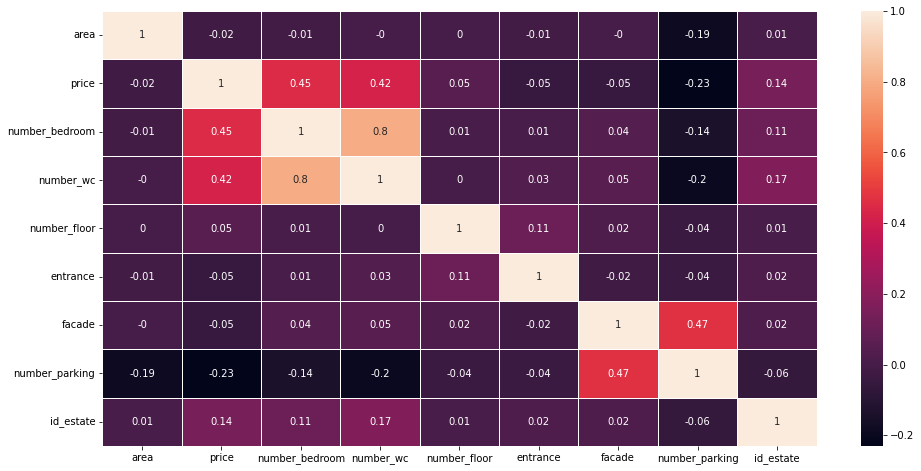

In [8]:
corr = data.corr().round(2)
mask = np.zeros_like(corr)
plt.subplots(figsize=(16, 8))
ax = sns.heatmap(corr, annot=True, linewidths=.5)

- phan bo cua dac trung

<AxesSubplot:xlabel='id_estate', ylabel='Count'>

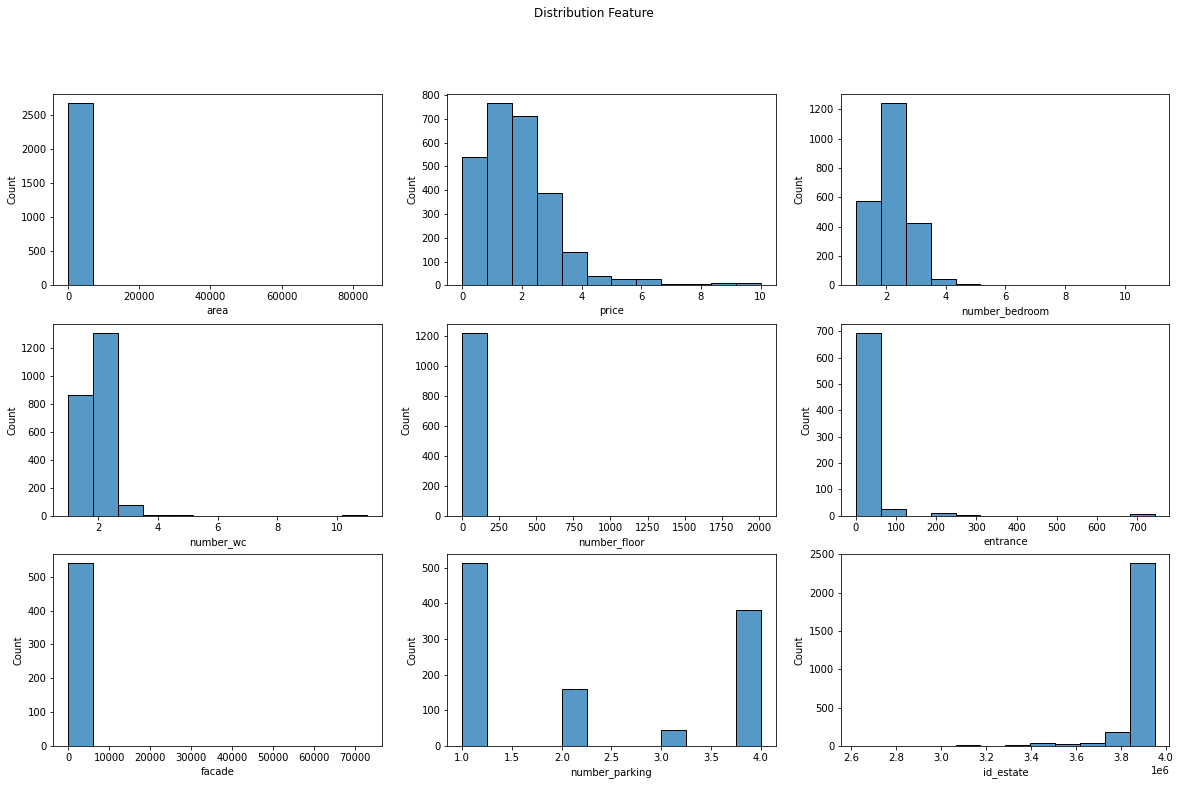

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sns.histplot(data= data["area"], bins= 12, kde= False, ax= axes[0, 0])
sns.histplot(data= data["price"], bins= 12, kde= False, ax= axes[0, 1])
sns.histplot(data= data["number_bedroom"], bins= 12, kde= False, ax= axes[0, 2])
sns.histplot(data= data["number_wc"], bins= 12, kde= False, ax= axes[1, 0])
sns.histplot(data= data["number_floor"], bins= 12, kde= False, ax= axes[1, 1])
sns.histplot(data= data["entrance"], bins= 12, kde= False, ax= axes[1, 2])
sns.histplot(data= data["facade"], bins= 12, kde= False, ax= axes[2, 0])
sns.histplot(data= data["number_parking"], bins= 12, kde= False, ax= axes[2, 1])
sns.histplot(data= data["id_estate"], bins= 12, kde= False, ax= axes[2, 2])


In [10]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from bioinfokit.analys import stat
# # perform multiple pairwise comparison (Tukey's HSD)
# # unequal sample size data, tukey_hsd uses Tukey-Kramer test
# res = stat()
# res.tukey_hsd(df=data, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
# res.tukey_summary
# # res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
# sm.qqplot(res.anova_std_residuals, line='45')
# plt.xlabel("Theoretical Quantiles")
# plt.ylabel("Standardized Residuals")
# plt.show()

# # histogram
# plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
# plt.xlabel("Residuals")
# plt.ylabel('Frequency')
# plt.show()
# https://www.reneshbedre.com/blog/anova.html
#https://www.geeksforgeeks.org/quantile-quantile-plots/


- quan he giua gia ca voi cac dac trung

<AxesSubplot:xlabel='price', ylabel='id_estate'>

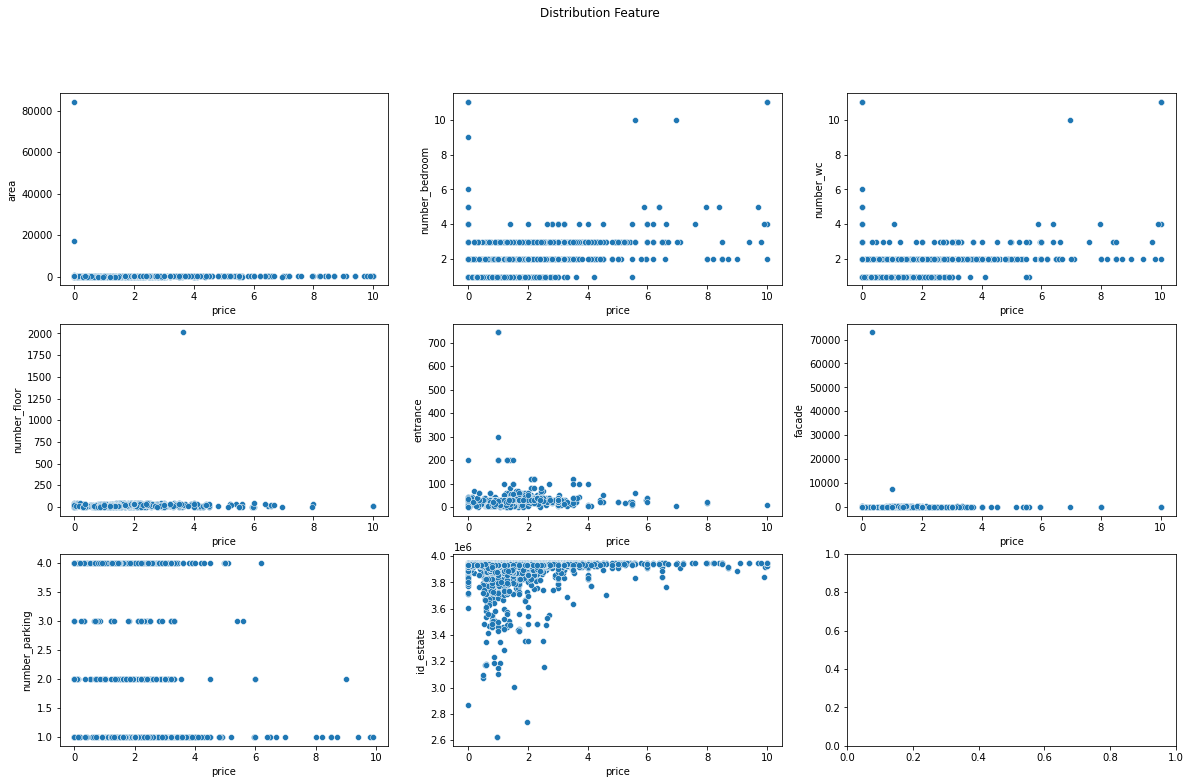

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sns.scatterplot(data=data, x="price", y="area", ax= axes[0, 0])
sns.scatterplot(data=data, x="price", y="number_bedroom", ax= axes[0, 1])
sns.scatterplot(data=data, x="price", y="number_wc", ax= axes[0, 2])
sns.scatterplot(data=data, x="price", y="number_floor", ax= axes[1, 0])
sns.scatterplot(data=data, x="price", y="entrance", ax= axes[1, 1])
sns.scatterplot(data=data, x="price", y="facade", ax= axes[1, 2])
sns.scatterplot(data=data, x="price", y="number_parking", ax= axes[2, 0])
sns.scatterplot(data=data, x="price", y="id_estate", ax= axes[2, 1])


In [12]:
# data["address"] = address_stat = data["address"].apply(lambda x: x.split(",")[len(x.split(",")) - 1])
data["address"] = data["address"].apply(lambda x: x.split(",")[len(x.split(",")) - 1])

address_stats = data.groupby('address')["address"].agg('count').sort_values(ascending= False)
address_stats

address
 Hà Nội                       1251
 Bình Dương                    540
 TP HCM                        334
 Bình Định                     150
 Đồng Nai                       55
 Đà Nẵng                        41
                                38
 Khánh Hòa                      36
                                25
 Quảng Ninh                     25
 Bắc Ninh                       25
 Bà Rịa - Vũng Tàu              21
 Hưng Yên                       20
 Hải Phòng                      17
 Bắc Giang                      16
 Thanh Hóa                      13
 Nghệ An                        12
 Quảng Bình                     10
 Vĩnh Phúc                       8
 Ha Noi                          6
 Phú Thọ                         5
 B\u00ECnh D\u01B0\u01A1ng       4
 Vĩnh Phúc                       4
 Vĩnh Long                       3
 B\u00ECnh \u0110\u1ECBnh        3
 Thái Nguyên                     2
 Long An                         2
 Tây Ninh                        2
 Đắk Lắk    

In [13]:
data1 = data.copy()
data1['number_bedroom'] = data1['number_bedroom'].replace(np.nan, np.nanmedian(data1['number_bedroom']))
data1['number_wc'] = data1['number_wc'].replace(np.nan, np.nanmedian(data1['number_wc']))
data1['number_floor'] = data1['number_floor'].replace(np.nan, np.nanmedian(data1['number_floor']))
data1['entrance'] = data1['entrance'].replace(np.nan, np.nanmedian(data1['entrance']))
data1['facade'] = data1['facade'].replace(np.nan, np.nanmedian(data1['facade']))
data1['number_parking'] = data1['number_parking'].replace(np.nan, np.nanmedian(data1['number_parking']))
data1.isna().sum()
# print(np.nanmedian(data1['number_parking']))

title                0
address              0
area                 0
price                0
number_bedroom       0
number_wc            0
number_floor         0
direction         1480
entrance             0
facade               0
number_parking       0
id_estate            0
dtype: int64

In [14]:
data1.head()

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,Hà Nội,30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,Hà Nội,55.0,2.10,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...",Hà Nội,65.0,1.70,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,Hà Nội,69.0,1.93,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,Bình Dương,114.0,3.05,3.0,2.0,16.0,NaN,50.0,30.0,2.0,3944714


In [15]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(data1['address'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
# genre_mappings
data1


,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,Hà Nội,30.0,1.250,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,Hà Nội,55.0,2.100,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...",Hà Nội,65.0,1.700,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,Hà Nội,69.0,1.930,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,Bình Dương,114.0,3.050,3.0,2.0,16.0,NaN,50.0,30.0,2.0,3944714
...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...",Bình Dương,42.0,0.896,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3931551
2673,"48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...",Bình Dương,48.0,1.200,1.0,1.0,10.0,NaN,30.0,30.0,2.0,3931239
2674,Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...,Bình Dương,33.0,0.800,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3932155
2675,Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...,Bình Dương,32.0,0.800,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3918708


In [16]:
# corr = data1.corr().round(2)
# mask = np.zeros_like(corr)
# plt.subplots(figsize=(16, 8))
# ax = sns.heatmap(corr, vmin=0, vmax=1, annot=True, linewidths=.5)

In [17]:
# fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# fig.suptitle('Distribution Feature')

# sns.displot(data= data1["area"])
# plt.show()
# sns.displot(data= data["price"], ax= axes[0, 1])
# sns.displot(data= data["number_bedroom"], ax= axes[0, 2])
# sns.displot(data= data["number_wc"], ax= axes[1, 0])
# sns.displot(data= data["number_floor"], ax= axes[1, 1])
# sns.displot(data= data["entrance"], ax= axes[1, 2])
# sns.displot(data= data["facade"], ax= axes[2, 0])
# sns.displot(data= data["number_parking"], ax= axes[2, 1])
# sns.displot(data= data["id_estate"], ax= axes[2, 2])
count = 0
for i in range(len(data1["price"])):
    if data1["price"][i] > 10 :
        count += 1
        # print(data1["price"][i])
        data1["price"] = data1["price"].replace(data1["price"][i], 0)
    
# count 
print(data1)

                                                  title      address   area  \
0     Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...       Hà Nội   30.0   
1     Căn 2 pn full nội thất view hồ 10ha. công viên...       Hà Nội   55.0   
2     Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...       Hà Nội   65.0   
3     Nhận nhà ở ngay không lo trả lãi tại teccodiam...       Hà Nội   69.0   
4     Chính chủ bán căn hộ chung cư citadines centra...   Bình Dương  114.0   
...                                                 ...          ...    ...   
2672  Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...   Bình Dương   42.0   
2673  48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...   Bình Dương   48.0   
2674  Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...   Bình Dương   33.0   
2675  Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...   Bình Dương   32.0   
2676  Vista riverside sắp nhận nhà. ban công view tr...   Bình Dương   43.0   

      price  number_bedroom  number_wc  number_floo

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [19]:
X=data1[["area", "number_bedroom", "number_wc", "id_estate", "address"]]
y = data1["price"].astype(float)
X

,area,number_bedroom,number_wc,id_estate,address
0,30.0,1.0,1.0,3947348,Hà Nội
1,55.0,2.0,1.0,3947371,Hà Nội
2,65.0,2.0,2.0,3946737,Hà Nội
3,69.0,2.0,2.0,3946177,Hà Nội
4,114.0,3.0,2.0,3944714,Bình Dương
...,...,...,...,...,...
2672,42.0,1.0,1.0,3931551,Bình Dương
2673,48.0,1.0,1.0,3931239,Bình Dương
2674,33.0,1.0,1.0,3932155,Bình Dương
2675,32.0,1.0,1.0,3918708,Bình Dương


In [20]:
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

In [21]:

def pipeline_model1(X, y, data):
    pipe = make_pipeline(preprocessor, RandomForestRegressor())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=32)

    pipe.fit(X_train, y_train)
    
    predict = pipe.predict(X_test)
    scores1 = cross_val_score( pipe, X, y, cv=5)
    print('Mean: {:.04f} {:.03f}'.format(np.mean(scores1), np.std(scores1)))
   
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
         
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
         f'Score (train)   : {pipe.score(X_train, y_train)}\n'
         f'Score (test)    : {pipe.score(X_test, y_test)}\n')
      
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)
def pipeline_model2(X, y, data):
    pipe = make_pipeline(preprocessor, XGBRegressor())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
    scores1 = cross_val_score( pipe, X, y, cv=5)
    print('Mean: {:.04f} {:.03f}'.format(np.mean(scores1), np.std(scores1)))
    
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
         
        f'Score (train)   : {pipe.score(X_train, y_train)}\n'
         f'Score (test)    : {pipe.score(X_test, y_test)}\n')
        
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
    for i in range(times):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = float(model.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value      ----->>>>> {real} $\n'
              f'Predicted Value ----->>>>> {pred} $')
        print()


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data[["area", "number_bedroom", "number_wc", "id_estate", "address"]]
    y = data.price.astype(float)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})

0.2800242995626917
Mean: 0.2702 0.087
MSE             : 1.2796154075629476

RMSE            : 1.1312008696791864
MAE             : 0.6336858366390546

Score (train)   : 0.9139414691627191
Score (test)    : 0.3608796731661299

Real Value      ----->>>>> 1.8 $
Predicted Value ----->>>>> 1.3180003999999985 $

Real Value      ----->>>>> 2.0 $
Predicted Value ----->>>>> 1.9383999999999995 $

Real Value      ----->>>>> 1.1 $
Predicted Value ----->>>>> 0.9395 $

Real Value      ----->>>>> 2.2 $
Predicted Value ----->>>>> 2.2623999999999977 $

Real Value      ----->>>>> 1.3 $
Predicted Value ----->>>>> 1.474099999999999 $



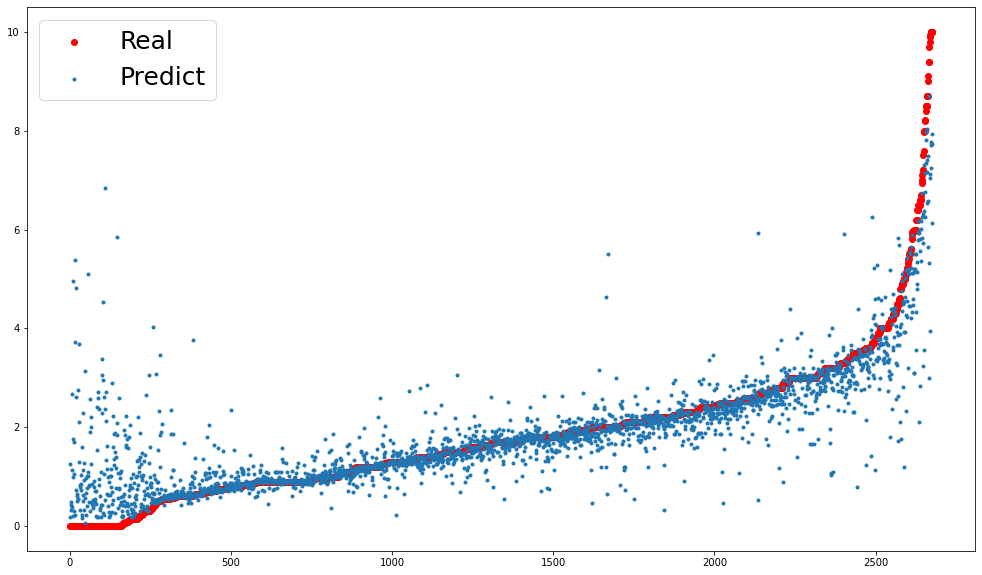

In [22]:
pipeline_model1(X, y, data1)

0.1904709887890014
Mean: 0.1905 0.153
MSE             : 1.3166996837148388

RMSE            : 1.1474753521164796
MAE             : 0.6610188309758102

Score (train)   : 0.9399325378747015
Score (test)    : 0.3423574558229252

Real Value      ----->>>>> 2.4 $
Predicted Value ----->>>>> 3.581652879714966 $

Real Value      ----->>>>> 3.8 $
Predicted Value ----->>>>> 4.495108127593994 $

Real Value      ----->>>>> 0.0 $
Predicted Value ----->>>>> 4.027601718902588 $

Real Value      ----->>>>> 2.7 $
Predicted Value ----->>>>> 2.7019171714782715 $

Real Value      ----->>>>> 1.91 $
Predicted Value ----->>>>> 1.5078340768814087 $



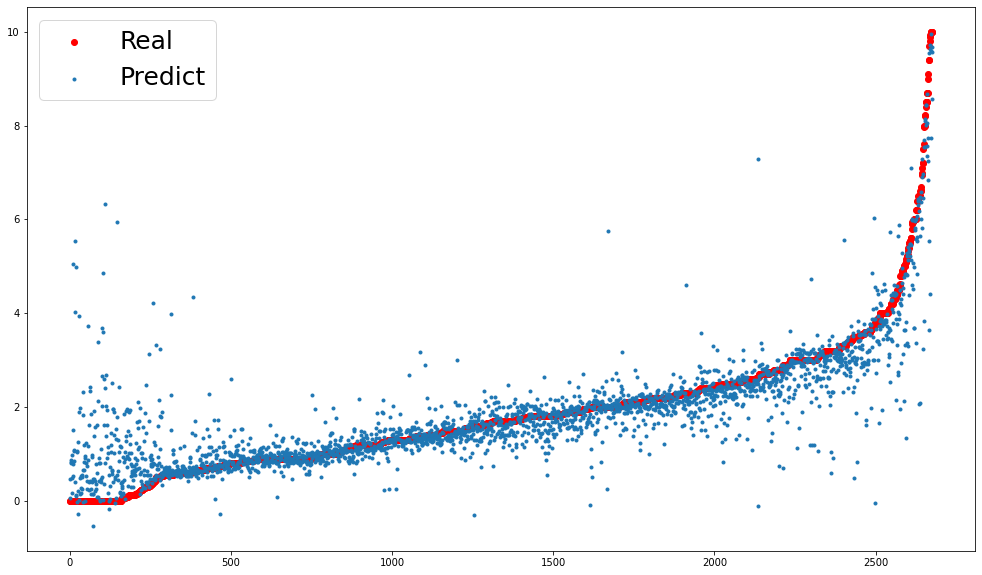

In [23]:
pipeline_model2(X, y, data1)